# Spatial graph comparisons using graphcompass  
### Spatial pancreas
Sander - Theis collab 

**Conditions:**
- ND: non-diabetic
- T1D: type 1 diabetic

### Requirements  

Environment ``graphcompass_v2``

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
import squidpy as sq
import graphcompass as gc

### Load data

In [17]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
file   = 'merged_slides_npod_annotation_refined.h5ad'
adata = sc.read(filename = folder + file)
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
    uns: 'CellTypes_max_colors', 'cell_type_coarse_colors', 'neighbors', 'pca', 'spatial'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
    layers: 'counts'

In [18]:
adata.obs.head()

,fov,Area,AspectRatio,CenterX_global_px,CenterY_global_px,Width,Height,Mean.MembraneStain,Max.MembraneStain,Mean.PanCK,...,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_NegPrb,log1p_total_counts_NegPrb,pct_counts_NegPrb,n_genes,cell_type_coarse,CellTypes_max
1_1,1_s1,3038,2.05,-25945.777778,122127.0,88,43,1830,13181,74,...,80.334728,100.000000,100.0,100.0,1,0.693147,0.418410,97,Acinar,Acinar_signal
2_1,1_s1,2507,1.34,-25566.777778,122125.0,63,47,902,5621,82,...,86.627907,100.000000,100.0,100.0,1,0.693147,0.581395,73,Acinar,Acinar_basal
3_1,1_s1,7970,1.53,-25278.777778,122102.0,142,93,1476,7846,134,...,73.144876,82.862191,100.0,100.0,3,1.386294,0.530035,197,Acinar,Endothelial
4_1,1_s1,5041,1.80,-24148.777778,122116.0,115,64,931,7451,161,...,72.619048,87.500000,100.0,100.0,2,1.098612,0.595238,142,Acinar,Acinar_highEnz
5_1,1_s1,3835,1.17,-24070.777778,122108.0,95,81,1016,7478,152,...,72.782875,88.073394,100.0,100.0,0,0.000000,0.000000,139,Acinar,Acinar_highEnz


In [19]:
# define library_key and cluster_key for computing spatial graphs using `squidpy.gr.spatial_neighbors` and 
# `squidpy.gr.nhood_enrichment` 
# spatial graphs are used by the different methods in GraphCompass

library_key="fov"
cluster_key="CellTypes_max"

# define condition_key used in comparisons
condition_key="condition" # key in adata.obs where conditions are stored

In [20]:
import pandas as pd
x = pd.crosstab(adata.obs.fov, adata.obs.CellTypes_max)
x

CellTypes_max,Acinar_basal,Acinar_highEnz,Acinar_signal,Acinar_sigdiff,Ductal,MUC5b_Ductal,Beta,Alpha,Delta,Activated_Stellate,Quiescent_Stellate,Endothelial,Macrophage,Tcells,Mast
fov,,,,,,,,,,,,,,,
1_s1,360,843,342,819,448,85,230,376,210,131,176,200,102,123,54
1_s2,439,852,391,959,926,125,133,122,56,154,152,251,92,109,71
1_s3,391,810,526,1168,986,255,208,309,162,312,198,283,397,152,232
2_s1,375,956,341,879,647,54,171,192,51,138,152,236,117,123,18
2_s2,595,1093,514,1123,1034,201,183,211,107,208,257,319,203,196,105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23_s1,580,971,483,913,586,163,322,236,131,234,243,346,190,177,8
23_s3,392,953,468,1175,821,118,191,180,68,178,220,318,133,88,3
24_s1,464,928,387,692,620,112,177,318,83,242,190,244,150,97,11


In [21]:
adata.X = adata.X.toarray()

### 1. Entire graph comparison

GraphCompass provides two methods to perform holistic graph comparisons:

A. Weisfeiler-Lehman graph kernels, and  
B. filtration curves.

Both methods result in graph embeddings that can be compared against one another to obtain a broad measure of tissue architecture similarity.

#### A. Weisfeiler-Lehman graph kernels

Compute Weisfeiler-Lehman Graph Kernels to compare conditions

In [ ]:
# compute WWL kernels
### results are stored in adata.uns["wl_kernel"]

gc.tl.wlkernel.compare_conditions(
   adata=adata,
   library_key=library_key,
   cluster_key=cluster_key,
   compute_spatial_graphs=True,
   kwargs_spatial_neighbors={
        'coord_type': 'generic',
        'delaunay': True,  
  }  
)

Computing spatial graphs...


100%|██████████| 1000/1000 [00:00<00:00, 1930.20/s]


Defining node features...


100%|██████████| 71/71 [01:52<00:00,  1.58s/it]
INFO:root:Continuous node features provided, using CONTINUOUS propagation scheme.


Computing Wasserstein distance between conditions...


In [ ]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
adata.write(folder+'merged_slides_npod_annotation_refined_wlkernel.h5ad')

In [30]:
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
    uns: 'CellTypes_max_colors', 'cell_type_coarse_colors', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'CellTypes_max_fov_nhood_enrichment', 'wl_kernel'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [31]:
# define necessary params
control_group="ND" # reference group
metric_key="wasserstein_distance" 
method="wl_kernel"

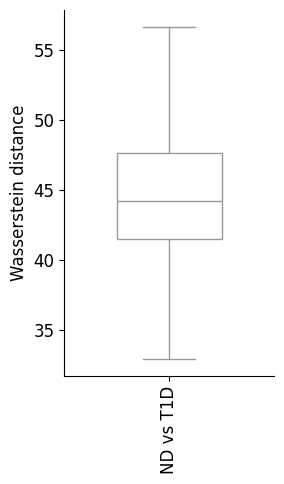

In [32]:
# Note: a smaller Wasserstein distance indicates a higher similarity between the two graphs, 
# while a larger distance indicates less similarity.

gc.pl.wlkernel.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    metric_key=metric_key,
    method=method,
    figsize=(3,5),
    dpi=100,
    #save="figures/mibitof_wwlkerenl.pdf"
)

#### Filtration curves

Compute filtration curves to compare conditions

In [19]:
# compute filtration curves
### results are stored in adata.uns["filtration_curves"]

# Note: in our case, the spatial graphs have been computed previously (to obtain the WL kernels), so we can set
## `compute_spatial_graphs` to False to save compute time. Otherwise, it should be set to True and 
## `kwargs_spatial_neighbors` should be set depending on the technology used to obtain the spatial data.

gc.tl.filtration_curves.compare_conditions(
    adata=adata,
    library_key=library_key,
    cluster_key=cluster_key,
    condition_key=condition_key,
    compute_spatial_graphs=False,
#     kwargs_spatial_neighbors={
#         'coord_type': 'generic',
#         'delaunay': True,  
#     }  
    
)

Spatial graphs were previously computed. Skipping computing spatial graphs...
Computing edge weights...


100%|██████████| 71/71 [00:39<00:00,  1.80it/s]


Computing edge weight threshold values...
Creating filtration curves...


100%|██████████| 71/71 [00:01<00:00, 69.33it/s]

Done!


In [23]:
adata.obs.CellTypes_max.cat.categories

Index(['Acinar_basal', 'Acinar_highEnz', 'Acinar_sigdiff', 'Acinar_signal',
       'Activated_Stellate', 'Alpha', 'Beta', 'Delta', 'Ductal', 'Endothelial',
       'MUC5b_Ductal', 'Macrophage', 'Quiescent_Stellate', 'Tcells'],
      dtype='object')

In [21]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
file   = 'merged_slides_npod_annotation_filtered.h5ad'#'S1_ct_based_niche_label_npod_annotated.h5ad' #'imputed_envi.h5ad'
adata.write(folder+'merged_slides_npod_annotation_filtered_wlkernel_filcurves.h5ad')

In [24]:
# define necessary params
node_labels=["Acinar_basal","Alpha", "Beta"] # node labels (e.g. cell types) we are intrested in visualising
metric_key="filtration_curves"

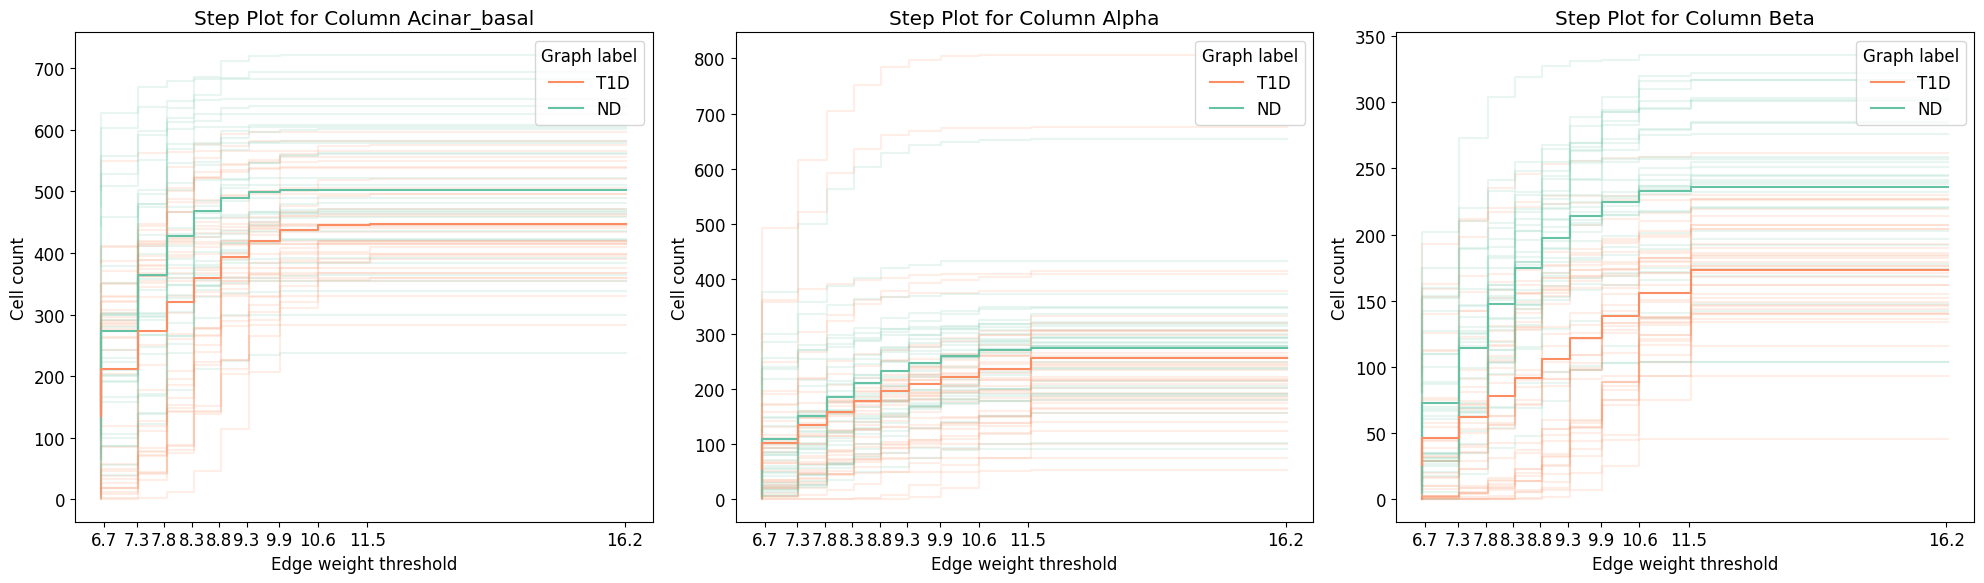

In [26]:
gc.pl.filtration_curves.compare_conditions(
    adata=adata,
    node_labels=node_labels,
    metric_key=metric_key,
    palette="Set2",
    dpi=100,
    figsize=(20,6),
    #save="figures/mibitof_filtration_curves.pdf"
)

### Specific-cell-type subgraphs comparison

In [33]:
# compute pairwise similarities between cell-type-specific graphs across samples
### results are stored in adata.uns["pairwise_similarities"]

# Note: in our case, the spatial graphs have been computed previously (to obtain the WL kernels), so we can set
## `compute_spatial_graphs` to False to save compute time. Otherwise, it should be set to True and 
## `kwargs_spatial_neighbors` should be set depending on the technology used to obtain the spatial data.

gc.tl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    cluster_key=cluster_key,
    method="portrait",
    compute_spatial_graphs=False,
#     kwargs_spatial_neighbors={
#         'coord_type': 'generic',
#         'delaunay': True,  
#     }  
)

Spatial graphs were previously computed. Skipping computing spatial graphs...
Computing graph similarities...


100%|██████████| 15/15 [1:23:07<00:00, 332.48s/it]


Done!


In [34]:
adata

AnnData object with n_obs × n_vars = 386727 × 979
    obs: 'fov', 'Area', 'AspectRatio', 'CenterX_global_px', 'CenterY_global_px', 'Width', 'Height', 'Mean.MembraneStain', 'Max.MembraneStain', 'Mean.PanCK', 'Max.PanCK', 'Mean.GCG', 'Max.GCG', 'Mean.CD3', 'Max.CD3', 'Mean.DAPI', 'Max.DAPI', 'cell_ID', 'condition', 'slide', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_NegPrb', 'log1p_total_counts_NegPrb', 'pct_counts_NegPrb', 'n_genes', 'cell_type_coarse', 'CellTypes_max'
    uns: 'CellTypes_max_colors', 'cell_type_coarse_colors', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'CellTypes_max_fov_nhood_enrichment', 'wl_kernel', 'pairwise_similarities'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_fov'
    layers: 'counts'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [35]:
folder = '/lustre/groups/ml01/workspace/sara.jimenez/spatial_pancreas_data/preprocessed_data/data4downstream/'
file   = 'merged_slides_npod_annotation_filtered.h5ad'#'S1_ct_based_niche_label_npod_annotated.h5ad' #'imputed_envi.h5ad'
adata.write(folder+'merged_slides_npod_annotation_refined_wlkernel_similarities.h5ad')

In [36]:
# define necessary params
control_group="ND" # reference group

15it [00:43,  2.91s/it]


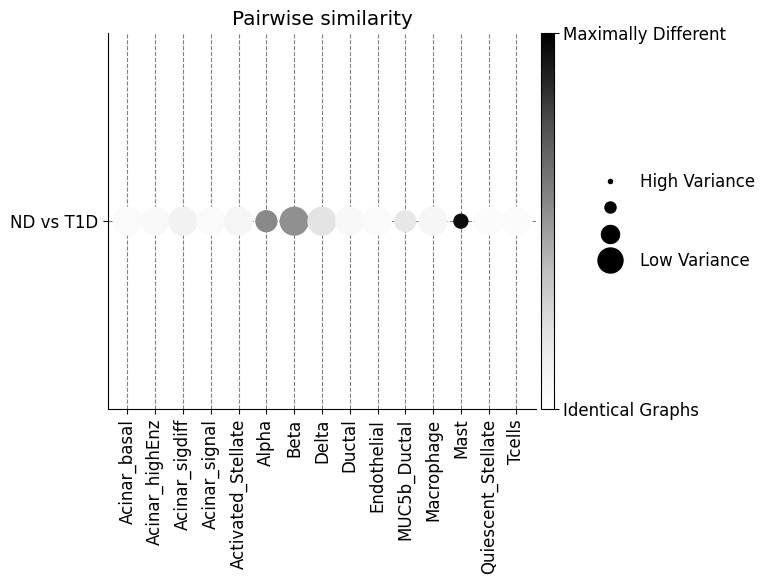

In [37]:
# Note: The size of the dot is indicative of the similarity score variance over samples. 
# The larger the dot size, the lower the score variance and the higher the score confidence is.

gc.pl.distance.compare_conditions(
    adata=adata,
    library_key=library_key,
    condition_key=condition_key,
    control_group=control_group,
    # add_ncells_and_density_plots=True,
    palette="Greys",
    dpi=100,
    figsize=(8,6),
#     save="figures/mibitof_portrait.pdf"
)